In [ ]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [1]:
# Libraries
from IPython import get_ipython
# import pandaState Government and IT Servicess as pd
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn as sns
from pandas.tools.plotting import andrews_curves
import matplotlib
import math
from matplotlib.dates import date2num
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
import itertools
from  numpy import log
from pyramid.arima import auto_arima
# from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import matplotlib.dates as mdates
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels import *
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
import itertools
# from pmdarima.arima.utils import ndiffs
from math import sqrt
import time
import datetime
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

C:\Users\20786136\AppData\Local\Continuum\anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
def import_data():
    print('******************************************************************************************************')
    Name = input('\033[1m' + 'Please enter Data Source Name: ')
    data = pd.read_csv(r"C:\Users\20786136\Desktop\Conduent\MultiChannel" +"\\"+ Name + '.csv')
    return data

In [3]:
def column_names(df):
    print('*******************************************************************************************************')
    print('\033[4m' +"Table's Columns : \n")
    for i in df.columns:
        print(i)
    print('*******************************************************************************************************')
# column_names(df)

In [13]:
def get_predictor(df):
    print('*******************************************************************************************************')
    print('\033[4m'+'Name of unique values\n')
    predictor = input("Please enter Column Name you want to see its unique values: ")
    print(df[predictor].value_counts())
    print("*******************************************************************************************************")

In [14]:
def get_name():# Show Column Contents- Ask to enter the value

    df = import_data()
    column_names(df)
    target = input('\033[91m' + 'Please enter the value you want to predict: ')
    
    predictor_variable = input('\033[36m' + 'Please enter the Predictor name: ')
    
    get_predictor(df)
    i = input('\033[1m'+'Please enter the value name you want to have a predict: ')
    
    df = df.loc[df[predictor_variable] == i]# make dataframe on value of column value of i
    df['DATE'] = pd.to_datetime(df['DATE'], errors = 'coerce')
    df = df.groupby(df['DATE'].dt.strftime('%Y-%m-%d'))[target].sum().reset_index()
    df = df.set_index('DATE')
    df.index = pd.to_datetime(df.index)
    y = df[target]
    df = df.sort_values('DATE')
    df = df[:-1]
    
#     x = df.values
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x)
#     x_scaled = [item for sublist in x_scaled for item in sublist]
#     df[target] = x_scaled
#     df[target] = df[target].replace(0.00, 0.01)
    #### Resampling
#     df[target] = df[target].resample('W').mean()
#     df[target] = df[target].rolling(7, center = True).mean()
#     df = df.dropna()
    
    train = df[:int((len(df)+1)*.91)]
    test = df[int((len(df)+1)*.91):]
    return train, test, y, df, target
# get_name()

In [6]:
def Drange(start, stop, step):
    s = start
    while s < stop:
        yield s
        s += step 

In [ ]:
"""
*Null Hypothesis: The series has a unit root (value of a =1)
**Alternate Hypothesis: The series has no unit root.
est for stationarity: 
If the test statistic is less than the critical value, 
we can reject the null hypothesis (aka the series is stationary). 
When the test statistic is greater than the critical value, 
we fail to reject the null hypothesis (which means the series is not stationary).
"""

# def ADF_test(df):
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(df, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

# #apply adf test on the series
# ADF_test(df['Sum_Impressions'])

In [ ]:
"""Transformation
Transformations are used to stabilize the non-constant variance of a series. 
Common transformation methods include power transform, square root, and log transform. 
Let’s do a quick log transform and differencing on our air passenger dataset: """

# df.plot(figsize=(16,8))

# df['Sum_Impressions_log'] = np.log(df['Sum_Impressions'])
# df['Sum_Impressions_log_diff'] = df['Sum_Impressions'] - df['Sum_Impressions_log'].shift(1)
# df['Sum_Impressions_log_diff'].dropna().plot()

In [7]:
#Method 1 - Naive Approach
def Naive_Approach():
    dd= np.asarray(train[target])
    y_hat = test.copy()
    print( '******************************   Naive Forecast Model    ********************************')
    y_hat['naive'] = dd[len(dd)-1]
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[target], label='Train')
    plt.plot(test.index,test[target], label='Test')
    plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
    plt.legend(loc='best')
    plt.title("Naive Forecast")
    plt.xticks(rotation = 45)
    plt.show()
    rms_naive = sqrt(mean_squared_error(test[target], y_hat.naive))
    print("The accuracy rate for Naive Approach Model is ", rms_naive)

def Moving_Average():
    dd= np.asarray(train[target])
    y_hat = test.copy()
    print( '******************************   Moving Average Model    ********************************')
    print(' ')
    n = [i for i in range(1,13)] # Sliding Window
    y_hat_avg = test.copy()
    rms_moving_avg = []
    for i in n:
        y_hat_avg['moving_avg_forecast'] = train[target].rolling(i).mean().iloc[-1]
        temp = sqrt(mean_squared_error(test[target], y_hat_avg.moving_avg_forecast))
        rms_moving_avg.append(temp)
        print('RMS for Last %s month '%i, temp)

    best_value = n[rms_moving_avg.index(min(rms_moving_avg))]
    y_hat_avg['moving_avg_forecast'] = train[target].rolling(best_value).mean().iloc[-1]
    plt.figure(figsize=(16,8))
    plt.plot(train[target], label='Train')
    plt.plot(test[target], label='Test')
    plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
    plt.legend(loc='best')
    plt.xticks(rotation = 45)
    plt.show()
    print(' Best RMS for Last %s month is '%n[rms_moving_avg.index(min(rms_moving_avg))], min(rms_moving_avg))
    
def SES():
    dd= np.asarray(train[target])
    print( '******************************   Simple Exponential Smoothing Model    *******************')
    print( ' ')
    n = [round(i,1) for i in Drange(0,1, 0.1)]
    y_hat_avg = test.copy()
    rms_Simple_Exponential_Smoothing = []
    for i in n:
        fit3 = SimpleExpSmoothing(np.asarray(train[target])).fit(smoothing_level= i ,optimized=False) 
        #I choose smoothing value as 0.5 by considering last two months which the weighted moving average would be 0.5
        y_hat_avg['SES'] = fit3.forecast(len(test))
        temp = sqrt(mean_squared_error(test[target], y_hat_avg.SES))
        rms_Simple_Exponential_Smoothing.append(temp)   
        print('RMS for α = %s '%i,' is ', temp)

    
    SES_best_value = n[rms_Simple_Exponential_Smoothing.index(min(rms_Simple_Exponential_Smoothing))]
    fit3 = SimpleExpSmoothing(np.asarray(train[target])).fit(smoothing_level=SES_best_value, optimized=True) 
    y_hat_avg['SES'] = fit3.forecast(len(test))
    plt.figure(figsize=(16,8))
    plt.plot(train[target], label='Train')
    plt.plot(test[target], label='Test')
    plt.plot(y_hat_avg['SES'], label='SES')
    plt.legend(loc='best')
    plt.xticks(rotation = 45)
    plt.show()
    print('Best RMS for α = %s'%n[rms_Simple_Exponential_Smoothing.index(min(rms_Simple_Exponential_Smoothing))],'is ', min(rms_Simple_Exponential_Smoothing))

def Holt_Linear_Trend():
    dd= np.asarray(train[target])
    y_hat_avg = test.copy()
    a = [round(d,1) for d in Drange(0, 1, 0.1)] 
    b = [round(k,1) for k in Drange(0, 1, 0.1)] 
    rms_Holt = []
    print( '******************************   Holt Linear Trend Model    *******************************')
    print( ' ')
    for i in a:
        for j in b:
            fit4 = Holt(np.asarray(train[target])).fit(smoothing_level = i , smoothing_slope = j)# 0≤ α ≤1 , and 0≤ β* ≤1 
            y_hat_avg['Holt_linear'] = fit4.forecast(len(test))
            temp = sqrt(mean_squared_error(test[target], y_hat_avg.Holt_linear))
            rms_Holt.append([i,j,temp])   
    #         print('RMS for α = %s'%i,' & ', 'β =%s'%j, 'is ', temp) 

    def findmin(List):
        leastList = []
        for i in range(len(List)):
            leastList.append(List[i][2])
        best_value = leastList.index(min(leastList))
        i = List[best_value][0]
        j = List[best_value][1]
    #     return (i,j, min(leastList))
        fit4 = Holt(np.asarray(train[target])).fit(smoothing_level = i, smoothing_slope = j)
        y_hat_avg['Holt_linear'] = fit4.forecast(len(test))

        plt.figure(figsize=(16,8))
        plt.plot(train[target], label='Train')
        plt.plot(test[target], label='Test')
        plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
        plt.legend(loc='best')
        plt.xticks(rotation = 45)
        plt.show()
        print('Best RMS for smoothing_level = %s'%i,' & ', 'smoothing_slope =%s'%j, 'is ', min(leastList))
    findmin(rms_Holt)
    
def Holt_Winter():
    print( '******************************   Holt Winter Model    ********************************')
    print('   ')
    y_hat_avg = test.copy()
    n = [i for i in Drange(2,11,1)]
    rms_Holt_Winters = []
    print('****All Possible RMS values for Holt-Winter Model****')
    print(' ')
    for i in n:
        fit5 = SimpleExpSmoothing(np.asarray(train[target])).fit()

        y_hat_avg['Holt_Winter'] = fit5.forecast(len(test))
        temp = sqrt(mean_squared_error(test[target], y_hat_avg['Holt_Winter']))
        rms_Holt_Winters.append(temp)
        print(' RMS values for seasonal_periods = %s '%i,' is ', temp)
    print ( '****************************************************************************************************')    
    ##
    Holt_Winter_best_value = n[rms_Holt_Winters.index(min(rms_Holt_Winters))]
    fit5 = SimpleExpSmoothing(np.asarray(train[target])).fit()
    y_hat_avg['Holt_Winter'] = fit5.forecast(len(test))
    plt.figure(figsize=(16,8))
    plt.plot( train[target], label='Train')
    plt.plot(test[target], label='Test')
    plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
    plt.legend(loc='best')
    plt.xticks(rotation = 45)
    plt.show()
    print('**** Best RMS %s'%n[rms_Holt_Winters.index(min(rms_Holt_Winters))],'is ', min(rms_Holt_Winters),'****')      

# solvers
solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']
########
def HWES():#Holt Winter’s Exponential Smoothing
    print( '******************************   Holt Winter’s Exponential Smoothing (HWES) Model    ********************************')
    print('   ')
    y_hat_avg = test.copy()
    n = [i for i in Drange(2,9,1)]
    rms_HWES = []
    print('****All Possible RMS values for Holt-Winter Exponential Smoothing Model****')
    print(' ')
    for i in n:
        fit5 = ExponentialSmoothing(np.asarray(train[target]) ,seasonal_periods=i, trend='add', seasonal='add').fit()

        y_hat_avg['HWES'] = fit5.forecast(len(test))
        temp = sqrt(mean_squared_error(test[target], y_hat_avg['HWES']))
        rms_HWES.append(temp)
        print(' RMS values for seasonal_periods = %s '%i,' is ', temp)
    print ( '*****************************************************************************************************')    
    ##
    HWES_best_value = n[rms_HWES.index(min(rms_HWES))]
    fit5 = ExponentialSmoothing(np.asarray(train[target]) ,seasonal_periods = HWES_best_value, trend='add', seasonal='add').fit()
    y_hat_avg['HWES'] = fit5.forecast(len(test))
    plt.figure(figsize=(16,8))
    plt.plot( train[target], label='Train')
    plt.plot(test[target], label='Test')
    plt.plot(y_hat_avg['HWES'], label="Holt_Winter's Exponential Smoothing")
    plt.legend(loc='best')
    plt.xticks(rotation = 45)
    plt.show()
    print('**** Best RMS for seasonal_periods = %s'%n[rms_HWES.index(min(rms_HWES))],'is ', min(rms_HWES),'****')      

# solvers
solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']

########
#######
def ARIMA():
    print( '******************************   ARIMA Model    ********************************')
    y
    y_hat_avg = test.copy()
#     while True:
#     try:
    Model = auto_arima(train, start_p=1, start_q=1,
                       max_p=3, max_q=3, m = 12,
                       start_P=0, seasonal=True,
                       d=1, D=1, trace=False,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)
    fitted = Model.fit(train)
    y_hat_avg['ARIMA'] = fitted.predict(n_periods= len(test))
#     except:  
#         Model = auto_arima(train, start_p=1, start_q=1,
#                                max_p=3, max_q=3, m=4,
#                                start_P=0, seasonal=False,
#                                d=1, D=1, trace=True,
#                                error_action='ignore',  
#                                suppress_warnings=True, 
#                                stepwise=True)
#         fitted = Model.fit(train)
#         y_hat_avg['ARIMA'] = fitted.predict(n_periods= len(test))
#         pass

        
    plt.figure(figsize=(16,8))
    plt.plot( train[target], label='Train')
    plt.plot(test[target], label='Test')
    plt.plot(y_hat_avg['ARIMA'], label='ARIMA')
    plt.legend(loc='best')
    plt.xticks(rotation = 45)
    plt.show()
    rms_ARIMA = sqrt(mean_squared_error(test[target] , y_hat_avg.ARIMA))
    
    print('**** Best RMS for ARIMA Model is ',rms_ARIMA,'****')
    
###################
def SARIMAX():
    print('******************************   SARIMAX Model    ********************************')
    y
    p = d = q = range(0, 2)#these integers use to parametrize ARIMA models, and acount for Seasonality, Trend and noise in datasset
    # n = [i for i in Drange(1,13,1)]
    temp =[]
    # for i in n:
    pdq = list(itertools.product(p, d, q))# generating all different combination of p,d and q.
    seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]# Generate all different combinations of 
    #seasonal p,d and q triplets
    # ARIMA Process Automation ( Grid Search ( Hyper Parameter optimization for model selection))
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=True, enforce_invertibility=True)#seasonal_order argument specifies the (P, D, Q, S) seasonal component 
                results_6 = mod.fit(disp=False)
                temp.append([param, param_seasonal,results_6.aic])

            except:
                continue
    
    y_hat_avg = test.copy()
    def Find_Best(List):
        while True:
            minn=[]
            for i in range(len(List)):
                minn.append(int(math.ceil(List[i][2])))
            best_value = minn.index(min(minn))
            i = List[best_value][0]
            j = List[best_value][1]
            try:
                fit6 = sm.tsa.statespace.SARIMAX(train[target], order = i, easonal_order = j,enforce_stationarity=True, enforce_invertibility=True).fit()
                y_hat_avg['SARIMAX'] = fit6.predict(start=y_hat_avg.index[0], end = y_hat_avg.index[len(y_hat_avg)-1], dynamic=True)
            except:
                fit6 = sm.tsa.statespace.SARIMAX(train[target], order = i, easonal_order = j,enforce_stationarity=False, enforce_invertibility=False).fit() 
                y_hat_avg['SARIMAX'] = fit6.predict(start=1, end = len(y_hat_avg), dynamic= True)
                continue
#             y_hat_avg['SARIMA'] = y_hat_avg['SARIMA'].fillna(method = 'ffill')
        plt.figure(figsize=(16,8))
        plt.plot( train[target], label='Train')
        plt.plot(test[target], label='Test')
        plt.plot(y_hat_avg['SARIMAX'], label='SARIMAX')
        plt.legend(loc='best')
        plt.xticks(rotation = 45)
        plt.show()

    Find_Best(temp)
    rms_SARIMAX = sqrt(mean_squared_error(test[target], y_hat_avg.SARIMAX))
    print("**** Best RMS for best Combination of order, seasonal order with least amount of AIC is ",round(rms_SARIMAX, 2),'****')

In [15]:
#Method 1 - Naive Approach
def Best_Naive():
    dd= np.asarray(train[target])
    y_hat = test.copy()
    y_hat['naive'] = dd[len(dd)-1]
    rms_naive = sqrt(mean_squared_error(test[target], y_hat.naive))
    return rms_naive

def Best_Moving_Average():
    dd= np.asarray(train[target])
    y_hat = test.copy()
    n = [i for i in range(1,13)] # Sliding Window
    y_hat_avg = test.copy()
    rms_moving_avg = []
    for i in n:
        y_hat_avg['moving_avg_forecast'] = train[target].rolling(i).mean().iloc[-1]
        temp = sqrt(mean_squared_error(test[target], y_hat_avg.moving_avg_forecast))
        rms_moving_avg.append(temp) 
    best_value = n[rms_moving_avg.index(min(rms_moving_avg))]
    y_hat_avg['moving_avg_forecast'] = train[target].rolling(best_value).mean().iloc[-1]
    return min(rms_moving_avg)

def Best_SES():
    dd= np.asarray(train[target])
    n = [round(i,1) for i in Drange(0,1, 0.1)]
    y_hat_avg = test.copy()
    rms_Simple_Exponential_Smoothing = []
    for i in n:
        fit3 = SimpleExpSmoothing(np.asarray(train[target])).fit(smoothing_level= i ,optimized=False) 
        #I choose smoothing value as 0.5 by considering last two months which the weighted moving average would be 0.5
        y_hat_avg['SES'] = fit3.forecast(len(test))
        temp = sqrt(mean_squared_error(test[target], y_hat_avg.SES))
        rms_Simple_Exponential_Smoothing.append(temp)   
    
    SES_best_value = n[rms_Simple_Exponential_Smoothing.index(min(rms_Simple_Exponential_Smoothing))]
    fit3 = SimpleExpSmoothing(np.asarray(train[target])).fit(smoothing_level=SES_best_value, optimized=True) 
    y_hat_avg['SES'] = fit3.forecast(len(test))
    return min(rms_Simple_Exponential_Smoothing)

def Best_Holt_Linear():
    y_hat_avg = test.copy()
    a = [round(d,1) for d in Drange(0, 1, 0.1)] 
    b = [round(k,1) for k in Drange(0, 1, 0.1)] 
    rms_Holt = []
    for i in a:
        for j in b:
            fit4 = Holt(np.asarray(train[target])).fit(smoothing_level = i , smoothing_slope = j)# 0≤ α ≤1 , and 0≤ β* ≤1 
            y_hat_avg['Holt_linear'] = fit4.forecast(len(test))
            temp = sqrt(mean_squared_error(test[target], y_hat_avg.Holt_linear))
            rms_Holt.append([i,j,temp])   
    def findmin(List):
        leastList = []
        for i in range(len(List)):
            leastList.append(List[i][2])
        best_value = leastList.index(min(leastList))

        return (List[best_value][2])

    return findmin(rms_Holt)

def Best_Holt_Winter():
    y_hat_avg = test.copy()
    n = [i for i in Drange(2,10,1)]
    rms_Holt_Winters = []
    for i in n:
        fit5 = SimpleExpSmoothing(np.asarray(train[target])).fit()
        y_hat_avg['Holt_Winter'] = fit5.forecast(len(test))
        temp = sqrt(mean_squared_error(test[target], y_hat_avg['Holt_Winter']))
        rms_Holt_Winters.append(temp)
    Holt_Winter_best_value = n[rms_Holt_Winters.index(min(rms_Holt_Winters))]
    fit5 = SimpleExpSmoothing(np.asarray(train[target])).fit()
    y_hat_avg['Holt_Winter'] = fit5.forecast(len(test))
    return min(rms_Holt_Winters)
#######
def Best_HWES():
    y_hat_avg = test.copy()
    n = [i for i in Drange(2,9,1)]
    rms_HWES = []
    for i in n:
        fit5 = ExponentialSmoothing(np.asarray(train[target]) ,seasonal_periods=i, trend='add', seasonal='add').fit()
        y_hat_avg['HWES'] = fit5.forecast(len(test))
        temp = sqrt(mean_squared_error(test[target], y_hat_avg['HWES']))
        rms_HWES.append(temp)
    HWES_best_value = n[rms_HWES.index(min(rms_HWES))]
    fit5 = ExponentialSmoothing(np.asarray(train[target]) ,seasonal_periods = HWES_best_value, trend='add', seasonal='add').fit()
    y_hat_avg['HWES'] = fit5.forecast(len(test))
    return min(rms_HWES)
#######

def Best_ARIMA():
    y
    y_hat_avg = test.copy()
#     while True:
#     try:
    Model = auto_arima(train,  start_p=1, start_q=1,
                       max_p=3, max_q=3, m=12,
                       start_P=0, seasonal=True,
                       d=1, D=1, trace=False,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)
    fitted = Model.fit(train)
    y_hat_avg['ARIMA'] = fitted.predict(n_periods= len(test))
#     except:  
#         Model = auto_arima(train, seasonal=False,
#                                d=1, D=1, trace=True,
#                                error_action='ignore',  
#                                suppress_warnings=True, 
#                                stepwise=True)
#         fitted = Model.fit(train)
#         y_hat_avg['ARIMA'] = fitted.predict(n_periods= len(test))
        
        
    rms_ARIMA = sqrt(mean_squared_error(test[target] , y_hat_avg.ARIMA))
    return rms_ARIMA

#####################
def Best_SARIMAX():
    y
    p = d = q = range(0, 2)#these integers use to parametrize ARIMA models, and acount for Seasonality, Trend and noise in datasset
    temp =[]
    pdq = list(itertools.product(p, d, q))# generating all different combination of p,d and q.
    seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]# Generate all different combinations of 
    warnings.filterwarnings("ignore") # specify to ignore warning messages
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=True, enforce_invertibility=True)#seasonal_order argument specifies the (P, D, Q, S) seasonal component 
                results_6 = mod.fit()
                temp.append([param, param_seasonal,results_6.aic])

            except:
                mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)#seasonal_order argument specifies the (P, D, Q, S) seasonal component 
#                 results_6 = mod.fit()
#                 temp.append([param, param_seasonal,results_6.aic])
                continue
    
    y_hat_avg = test.copy()
    def Find_Best(List):
        minn=[]
        for i in range(len(List)):
            minn.append(int(math.ceil(List[i][2])))
        best_value = minn.index(min(minn))
        i = List[best_value][0]
        j = List[best_value][1]
        try:
            fit6 = sm.tsa.statespace.SARIMAX(train[target], order = i, easonal_order = j,enforce_stationarity=True, enforce_invertibility=True).fit()
            y_hat_avg['SARIMAX'] = fit6.predict(start=y_hat_avg.index[0], end = y_hat_avg.index[len(y_hat_avg)-1], dynamic= True)
        except:
            fit6 = sm.tsa.statespace.SARIMAX(train[target], order = i, easonal_order = j,enforce_stationarity=False, enforce_invertibility=False).fit() 
            y_hat_avg['SARIMAX'] = fit6.predict(start=y_hat_avg.index[0], end = y_hat_avg.index[len(y_hat_avg)-1], dynamic= True)
            pass

    Find_Best(temp)
    rms_SARIMAX = sqrt(mean_squared_error(test[target], y_hat_avg.SARIMAX))
    
    return round(int(rms_SARIMAX))

In [16]:
def simpleModel():
    min_rms = []
    print('*****************************************SIMPLE MODELS******************************************')
    print(" ")
    Naive_Approach = Best_Naive()
    print('Naive Approach is Finished!')
    rms_moving_avg = Best_Moving_Average()
    print('Moving Average is Finished!')
    SES = Best_SES()
    print('SES is Finished!')
    Holt_Linear = Best_Holt_Linear()
    print('Holt Linear is Finished!')
    Holt_Winter = Best_Holt_Winter()
    print('Holt Winter is Finished!')

    Comparison = pd.DataFrame({'Naive_Approach_1()' : Naive_Approach,
                               'Moving_Average_1()' : rms_moving_avg,
                               'SES_1()': SES,
                               'Holt_Linear_Trend_1()' : Holt_Linear,
                               'Holt_Winter_1()': Holt_Winter,
                               },index=['RMS'])

    Comparison = Comparison.T
    ################
    print('*******************************************************************************************************')
    print(" ")
    print('The Root Mean Square Errors for all models')
    print(" ")
    print('*******************************************************************************************************')
    print(" ")
    print(Comparison)
    print(" ")
    print('*******************************************************************************************************')
    print(" ")
    Comparison.replace('', None)
    min_list = []
    for i in Comparison.RMS:
        min_list.append(i)

    best_value = min_list.index(min(min_list))
    Best_answer = Comparison.index[best_value]
#     print(Best_answer)
    Best_answer = Best_answer.split('_1')
    func = Best_answer[0]
#     print(func)
    def best_function(best):
        n = best+'()'
        return eval(n)
    best_function(func)

In [17]:
def complexModel():
    min_rms = []
    print('*****************************************COMPLEX MODELS******************************************')
    print(" ")
    ARIMA = Best_ARIMA()
    print('ARIMA is Finished')
#     SARIMAX = Best_SARIMAX() 
#     print('SARIMAX is Finished!')
    HWES = Best_HWES()
    print('Holt Winter’s Exponential Smoothing')
    Comparison = pd.DataFrame({'ARIMA_1()' : ARIMA,
#                                'SARIMAX_1()': SARIMAX,
                               'HWES_1()': HWES
                               },index=['RMS'])

    Comparison = Comparison.T
    ################
    print('*******************************************************************************************************')
    print(" ")
    print('The Root Mean Square Errors for all models')
    print(" ")
    print('*******************************************************************************************************')
    print(" ")
    print(Comparison)
    print(" ")
    print('*******************************************************************************************************')
    print(" ")
    Comparison.replace('', None)
    min_list = []
    for i in Comparison.RMS:
        min_list.append(i)

    best_value = min_list.index(min(min_list))
    Best_answer = Comparison.index[best_value]
#     print(Best_answer)
    Best_answer = Best_answer.split('_1')
    func = Best_answer[0]
#     print(func)
    def best_function(best):
        n = best+'()'
        return eval(n)
    best_function(func)
    

In [18]:
# train, test, y = get_client_name()
def BCM():
    min_rms = []
    print('*******************************************************************************************************')
    print(" ")
    Naive_Approach = Best_Naive()
    print('Naive Approach is Finished!')
    rms_moving_avg = Best_Moving_Average()
    print('Moving Average is Finished!')
    SES = Best_SES()
    print('SES is Finished!')
    Holt_Linear = Best_Holt_Linear()
    print('Holt Linear is Finished!')
    Holt_Winter = Best_Holt_Winter()
    print('Holt Winter is Finished!')
    ARIMA = Best_ARIMA()
    print('ARIMA is Finished')
#     SARIMAX = Best_SARIMAX() 
#     print('SARIMAX is Finished!')
    HWES = Best_HWES()
    print('Holt Winter’s Exponential Smoothing')
    Comparison = pd.DataFrame({'Naive_Approach_1()' : Naive_Approach,
                               'Moving_Average_1()' : rms_moving_avg,
                               'SES_1()': SES,
                               'Holt_Linear_Trend_1()' : Holt_Linear,
                               'Holt_Winter_1()': Holt_Winter,
                               'ARIMA_1()' : ARIMA,
#                                'SARIMAX_1()': SARIMAX,
                               'HWES_1()': HWES
                               },index=['RMS'])

    Comparison = Comparison.T
    ################
    print('#######################################################################################################')
    print(" ")
    print('The Root Mean Square Errors for all models')
    print(" ")
    print('*******************************************************************************************************')
    print(" ")
    print(Comparison)
    print(" ")
    print('#######################################################################################################')
    print(" ")
    Comparison.replace('', None)
    min_list = []
    for i in Comparison.RMS:
        min_list.append(i)

    best_value = min_list.index(min(min_list))
    Best_answer = Comparison.index[best_value]
#     print(Best_answer)
    Best_answer = Best_answer.split('_1')
    func = Best_answer[0]
#     print(func)
    def best_function(best):
        n = best+'()'
        return eval(n)
    best_function(func)

Welcome to forecasting application, would you like to continue?(y/n)y
******************************************************************************************************
Please enter Data Source Name: MultiChannel
*******************************************************************************************************
Table's Columns : 

DATE
DocumentState
Sum_Impressions
Sum_PageCount
Sum_EnvelopeCount
CountDistinct_JobID
Client
Rate Impression
Sum_ShippingCost
*******************************************************************************************************
Please enter the value you want to predict: Sum_Impressions
Please enter the Predictor name: Client
*******************************************************************************************************
Name of unique values

Please enter Column Name you want to see its unique values: Client
Anthem    1464
Aetna     1444
Optum     1387
BNYM      1195
CGI       1036
BOA        109
Name: Client, dtype: int64
*****************

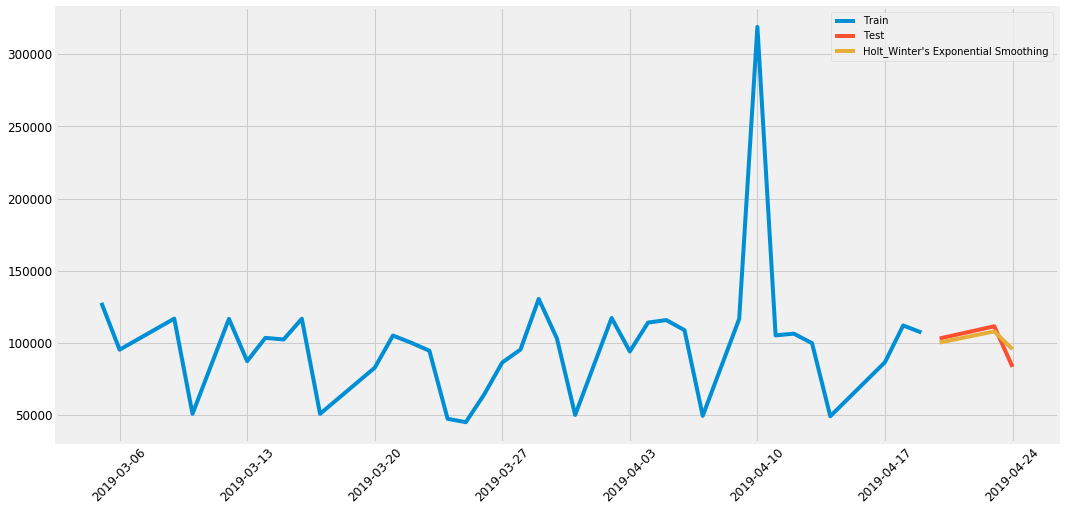

**** Best RMS for seasonal_periods = 2 is  7537.805778834371 ****
 
Welcome to forecasting application, would you like to continue?(y/n)n


In [19]:
while True:
    i = input('Welcome to forecasting application, would you like to continue?(y/n)')
    if i == 'y':
        train, test,y, df, target = get_name()
#         target = target[4]
        j = input('Please choose the modelling method! (Simple, Complex or Both')

        if j == 'Simple':
            simpleModel()
        elif j == 'Complex':
            complexModel()
        elif j == 'Both':
            BCM()
        print(' ')
    elif i == 'n':
        break
    else:
        print('Invalid input! Please try again.')

In [ ]:
ARIMA()